<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/Descriptive_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
import statsmodels.api as sm
from scipy import stats
warnings.filterwarnings("ignore")

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1ZWCXzEAZ7PoKt8g3e7bOIZHMDSJhGsUg'})
downloaded.GetContentFile('stmat.csv')

In [ ]:
datos = pd.read_csv('stmat.csv',sep=';',encoding='latin-1')

In [ ]:
datos

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
datos.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Agrupando datos discretos

In [ ]:
datos.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [ ]:
datos.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [ ]:
datos.Pstatus.value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

Q1 : ¿ Existe preferencia por algún genero en cada escuela?

In [ ]:
datos.sex.value_counts(normalize='index')

F    0.526582
M    0.473418
Name: sex, dtype: float64

In [ ]:
datos.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [ ]:
pd.crosstab(datos.school,datos.sex)

sex,F,M
school,,
GP,183,166
MS,25,21


In [ ]:
pd.crosstab(datos.famrel,datos.sex)

sex,F,M
famrel,,
1,5,3
2,9,9
3,38,30
4,107,88
5,49,57


In [ ]:
pd.crosstab(datos.school,datos.sex,normalize='index') # Normalizando según la fila

sex,F,M
school,,
GP,0.524355,0.475645
MS,0.543478,0.456522


In [ ]:
round(pd.crosstab(datos.school,datos.sex,normalize='index'),3) # Normalizando según la fila

sex,F,M
school,,
GP,0.524,0.476
MS,0.543,0.457


In [ ]:
100*round(pd.crosstab(datos.school,datos.sex,normalize='index'),3) # Porcentajes según la fila

sex,F,M
school,,
GP,52.4,47.6
MS,54.3,45.7


In [ ]:
pd.crosstab(datos.school,datos.sex,normalize='columns')

sex,F,M
school,,
GP,0.879808,0.887701
MS,0.120192,0.112299


In [ ]:
pd.crosstab(datos.school,datos.sex,normalize='all')

sex,F,M
school,,
GP,0.463291,0.420253
MS,0.063291,0.053165


<Axes: xlabel='school'>

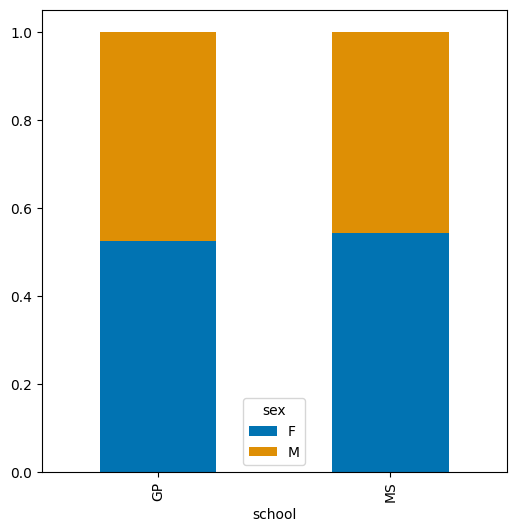

In [ ]:
pd.crosstab(datos.school,datos.sex,normalize='index').plot(kind='bar',stacked = 'True')

Q2 : ¿ Existe diferencia en el acceso de internet en cada escuela?

<Axes: xlabel='school'>

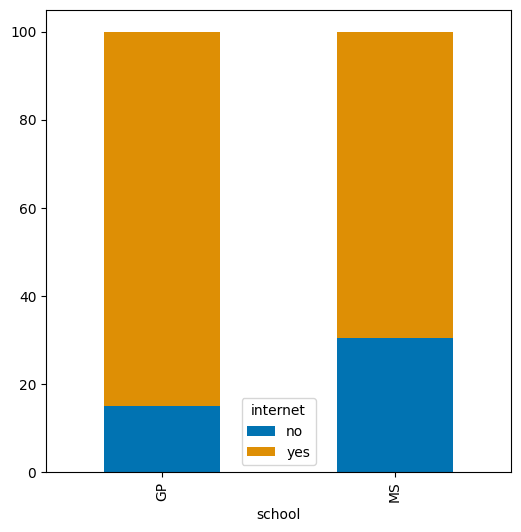

In [ ]:
round(pd.crosstab(datos.school,datos.internet,normalize='index')*100,2).plot(kind='bar',stacked = 'True')

Q3 : ¿ Existe diferencia en la procedencia (Urbana o Rural) de los estudiantes por escuela?

<Axes: xlabel='school'>

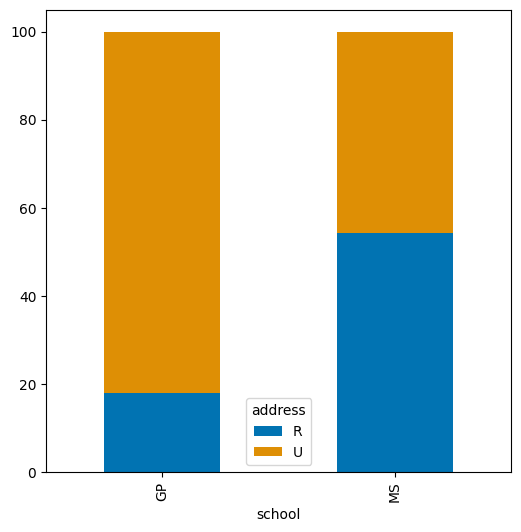

In [ ]:
round(pd.crosstab(datos.school,datos.address,normalize='index')*100,2).plot(kind='bar',stacked = 'True')

## Agrupando datos por categorías

In [ ]:
datos.G3>10

0      False
1      False
2      False
3       True
4      False
       ...  
390    False
391     True
392    False
393    False
394    False
Name: G3, Length: 395, dtype: bool

In [ ]:
datos[datos.G3>10] #Datos de estudiantes que aprobaron

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
378,MS,F,18,U,GT3,T,3,3,other,other,...,4,1,3,1,2,1,0,15,15,15
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,3,2,4,1,4,2,4,15,14,14


In [ ]:
datos[datos.G3>10].sex.value_counts()

In [ ]:
datos[(datos.G3>10)&(datos.sex=='F')] # Datos de estudiantes MUJERES que aprobaron

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
11,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,4,14,14,14
16,GP,F,16,U,GT3,T,4,4,services,services,...,3,2,3,1,2,2,6,13,14,14
38,GP,F,15,R,GT3,T,3,4,services,health,...,4,3,2,1,1,5,2,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,MS,F,18,R,GT3,T,4,4,other,teacher,...,3,2,2,4,2,5,10,14,12,11
372,MS,F,17,U,GT3,T,2,2,other,at_home,...,3,4,3,1,1,3,8,13,11,11
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15


In [ ]:
datos[(datos.G3>10)&(datos.sex=='F')&(datos.address=='R')&(datos.famrel==5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
204,GP,F,16,R,GT3,T,2,2,services,services,...,5,3,5,1,1,5,6,10,10,11
282,GP,F,18,R,LE3,T,1,1,at_home,other,...,5,2,2,1,1,3,1,12,12,12
336,GP,F,19,R,GT3,A,3,1,services,at_home,...,5,4,3,1,2,5,12,14,13,13
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19


In [ ]:
datos[datos.G3>10].school.value_counts()

GP    190
MS     19
Name: school, dtype: int64

In [ ]:
datos[datos.G3>10].sex.value_counts()

M    106
F    103
Name: sex, dtype: int64

In [ ]:
pd.crosstab(datos[datos.G3>10].G3,datos[datos.G3>10].school)

school,GP,MS
G3,,
11,43,4
12,28,3
13,26,5
14,26,1
15,30,3
16,14,2
17,6,0
18,12,0
19,4,1


In [ ]:
pd.crosstab(datos[datos.G3>10].G3,datos[datos.G3>10].school).sort_index()

school,GP,MS
G3,,
11,43,4
12,28,3
13,26,5
14,26,1
15,30,3
16,14,2
17,6,0
18,12,0
19,4,1


In [ ]:
tab_aprobados=pd.crosstab(datos[datos.G3>10].school,datos[datos.G3>10].sex)

In [ ]:
tab_aprobados

sex,F,M
school,,
GP,92,98
MS,11,8


In [ ]:
tab_total=pd.crosstab(datos.school,datos.sex)

In [ ]:
tab_total

sex,F,M
school,,
GP,183,166
MS,25,21


In [ ]:
100*round(tab_aprobados/tab_total,3)  ## % de aprobación de estudiantes por sexo en cada escuela.

sex,F,M
school,,
GP,50.3,59.0
MS,44.0,38.1


Conclusión: En la escuela GP los hombres tiene una tasa de aprobación mayor que las mujeres. Caso contrário ocurre en la escuela MS, ya que alli la tasa de aprobación de mujeres es mayor que la tasa de aprobación de hombres.

## Barchart

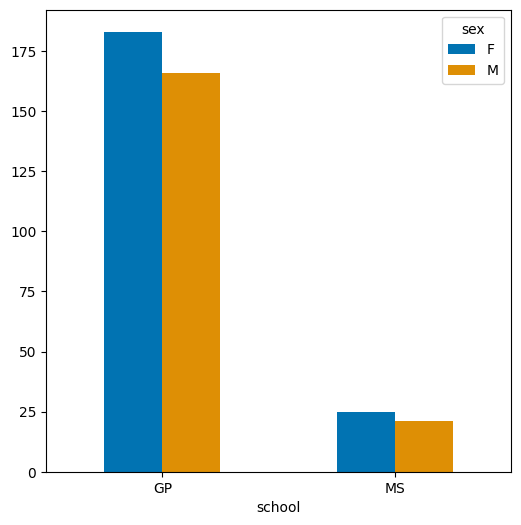

In [ ]:
pd.crosstab(datos.school,datos.sex).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

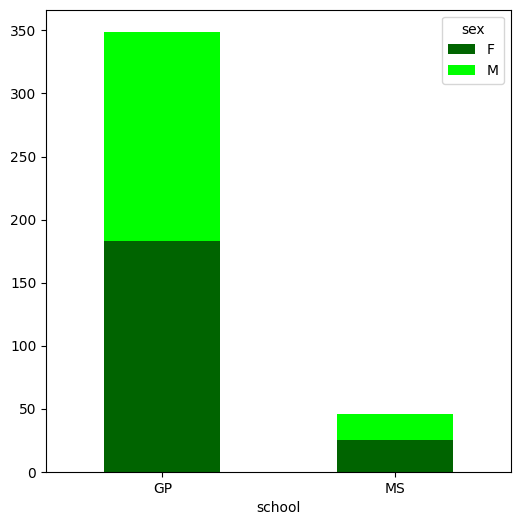

In [ ]:
pd.crosstab(datos.school,datos.sex).plot(kind='bar',stacked = 'True',color=['darkgreen','lime'])
plt.xticks(rotation=0)
plt.show()

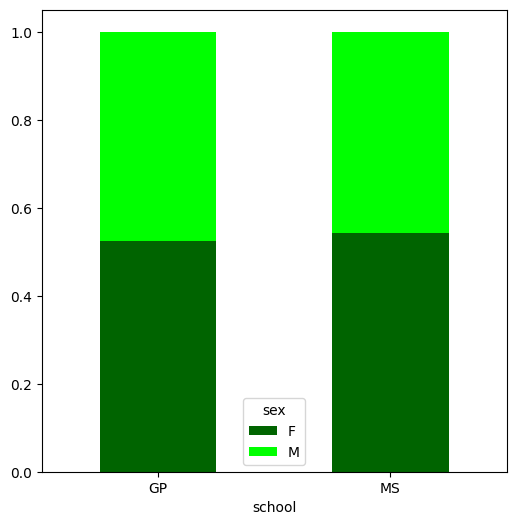

In [ ]:
pd.crosstab(datos.school,datos.sex,normalize='index').plot(kind='bar',stacked = 'True',color=['darkgreen','lime'])
plt.xticks(rotation=0)
plt.show()

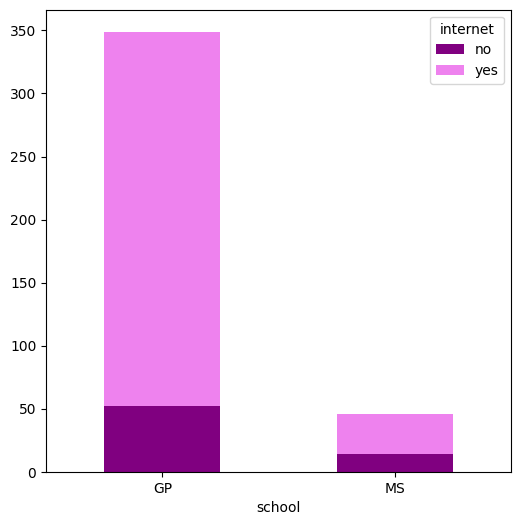

In [ ]:
pd.crosstab(datos.school,datos.internet).plot(kind='bar',stacked = 'True',color=['purple','violet'])
plt.xticks(rotation=0)
plt.show()

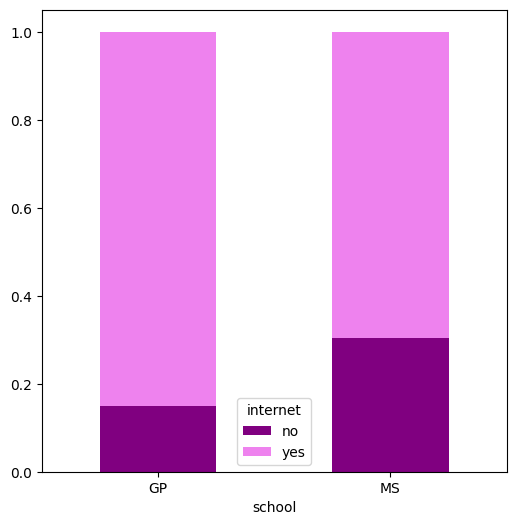

In [ ]:
pd.crosstab(datos.school,datos.internet,normalize='index').plot(kind='bar',stacked = 'True',color=['purple','violet'])
plt.xticks(rotation=0)
plt.show()

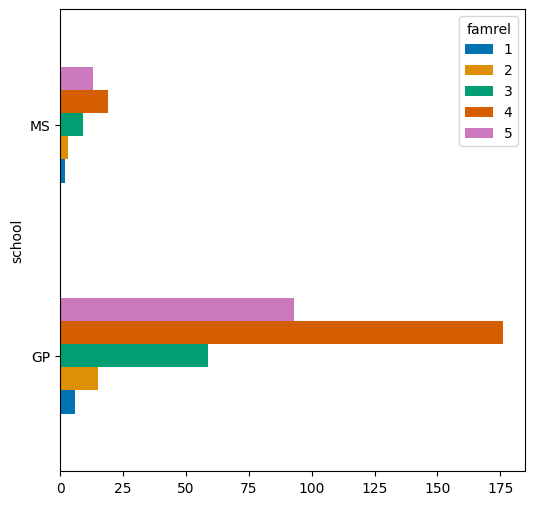

In [ ]:
pd.crosstab(datos.school,datos.famrel).plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

In [ ]:
100*round(pd.crosstab(datos.school,datos.famrel,normalize='index'),3)

famrel,1,2,3,4,5
school,,,,,
GP,1.7,4.3,16.9,50.4,26.6
MS,4.3,6.5,19.6,41.3,28.3


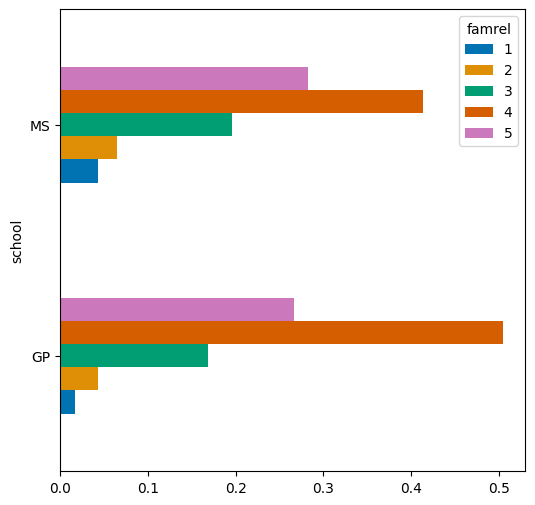

In [ ]:
pd.crosstab(datos.school,datos.famrel,normalize='index').plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

## Pie Chart

In [ ]:
datos.freetime.value_counts().sort_index()

1     19
2     64
3    157
4    115
5     40
Name: freetime, dtype: int64

In [ ]:
Tab=datos.freetime.value_counts().sort_index()
Tab.index=['Very Low','Low','Regular','High','Very High']
Tab

Very Low      19
Low           64
Regular      157
High         115
Very High     40
Name: freetime, dtype: int64

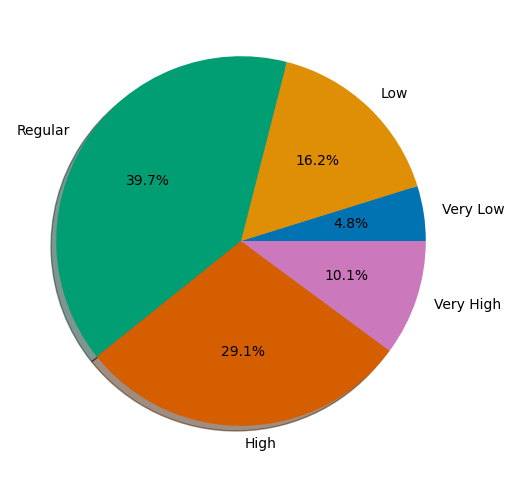

In [ ]:
plt.pie(Tab.values,shadow=True,autopct='%1.1f%%',labels=Tab.index)
plt.show()

In [ ]:
from matplotlib import cm
from matplotlib import colors

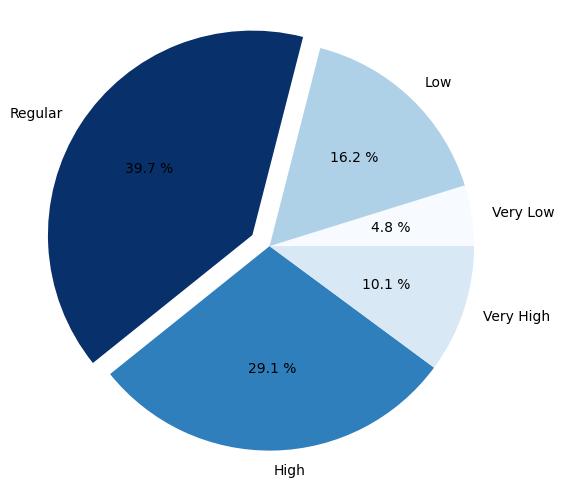

In [ ]:
nombres=Tab.index
normdata = colors.Normalize(min(Tab.values), max(Tab.values))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(Tab.values))
desfase = (0, 0, 0.1, 0,0)
plt.pie(Tab.values, labels=nombres, autopct="%0.1f %%", colors=colores,explode=desfase)
plt.axis("equal")
plt.show()

## Histogramas

<Axes: >

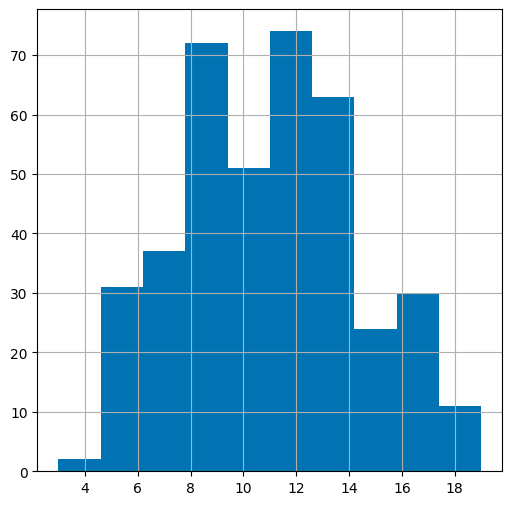

In [ ]:
datos.G1.hist()

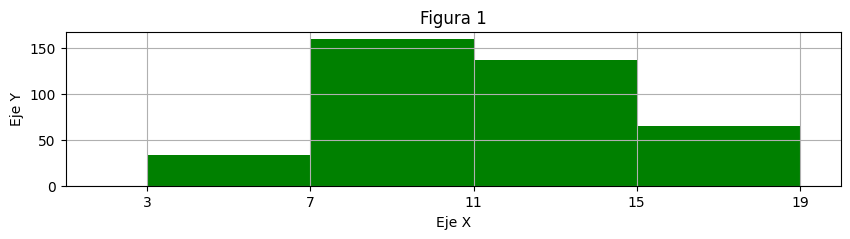

In [ ]:
plt.rcParams["figure.figsize"] = (10,2)
datos.G1.hist(bins=4,density=False, color='g',cumulative=False)
plt.xlim(1,20)
plt.xticks([3,7,11,15,19])
plt.title('Figura 1')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

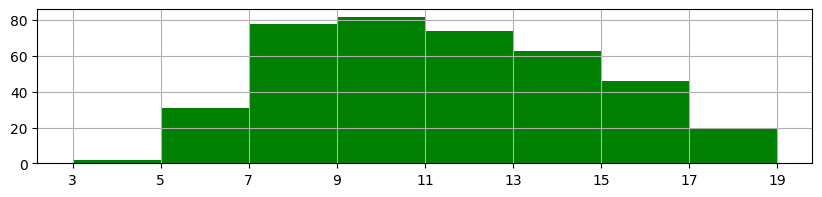

In [ ]:
#plt.rcParams["figure.figsize"] = (10,6)
datos.G1.hist(bins=8,color='g')
plt.xticks([3,5,7,9,11,13,15,17,19])

plt.show()

## Medidas de Tendencia Central

**Media**

In [ ]:
datos.G1.mean()

10.90886075949367

In [ ]:
round(datos.G1.mean(),2)

10.91

**Mediana**

In [ ]:
datos.G1.median()

11.0

**Quantiles**

In [ ]:
np.quantile(datos.G1, 0.25) # Primer Quartil

8.0

In [ ]:
np.quantile(datos.G1, 0.5) # Segundo Quartil o Mediana

11.0

In [ ]:
np.quantile(datos.G1, 0) # Valor min

3

In [ ]:
np.quantile(datos.G1, 0.75) # Tercer Quartil

13.0

In [ ]:
np.quantile(datos.G1, 1) # Valor máximo

19

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

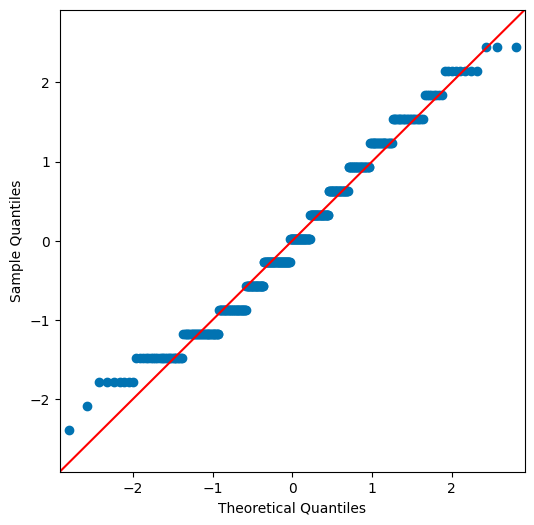

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
sm.qqplot(datos.G1,fit=True, line="45")
plt.show()

**Moda**

In [ ]:
import statistics
statistics.mode(datos['G1'])

10

## Medidas de Dispersión

In [ ]:
datos.groupby('sex').G3.mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [ ]:
datos.groupby('school').G3.mean()

school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

In [ ]:
datos.groupby('famrel').G3.mean()

famrel
1    10.625000
2     9.888889
3    10.044118
4    10.358974
5    10.830189
Name: G3, dtype: float64

In [ ]:
datos.groupby('romantic').G3.mean()

romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64

In [ ]:
datos.groupby('Walc').G3.mean()

Walc
1    10.735099
2    10.082353
3    10.725000
4     9.686275
5    10.142857
Name: G3, dtype: float64

In [ ]:
datos.groupby('sex').G3.max()

sex
F    19
M    20
Name: G3, dtype: int64

In [ ]:
datos.groupby('sex').G3.min()

sex
F    0
M    0
Name: G3, dtype: int64

In [ ]:
datos[datos.G3>0].groupby('sex').G3.mean()

sex
F    11.205405
M    11.866279
Name: G3, dtype: float64

In [ ]:
datos[(datos.G3>0)&(datos.address=='R')].groupby('sex').G3.mean()

sex
F    10.461538
M    11.000000
Name: G3, dtype: float64

In [ ]:
datos.groupby('school').G3.std()

school
GP    4.625397
MS    4.237229
Name: G3, dtype: float64

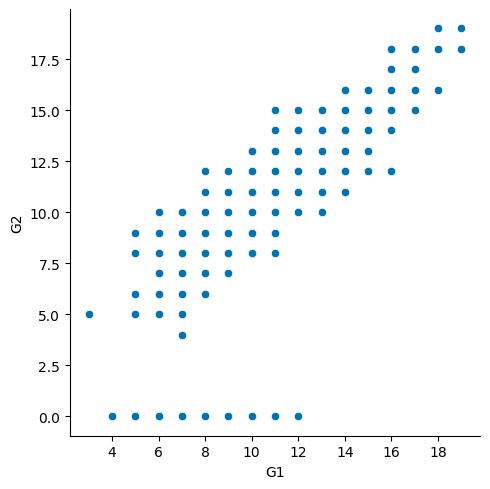

In [ ]:
sns.relplot(x='G1', y='G2', data=datos)

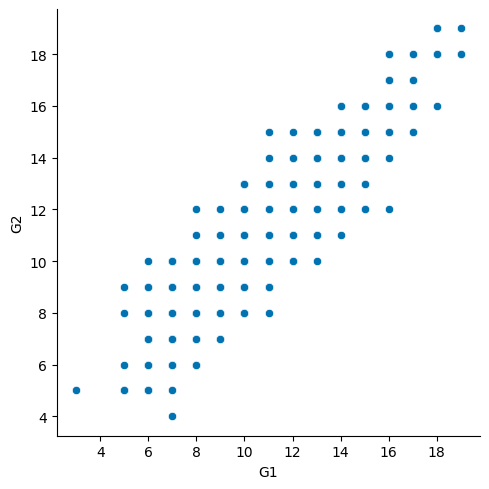

In [ ]:
sns.relplot(x='G1', y='G2', data=datos[datos.G2>0])

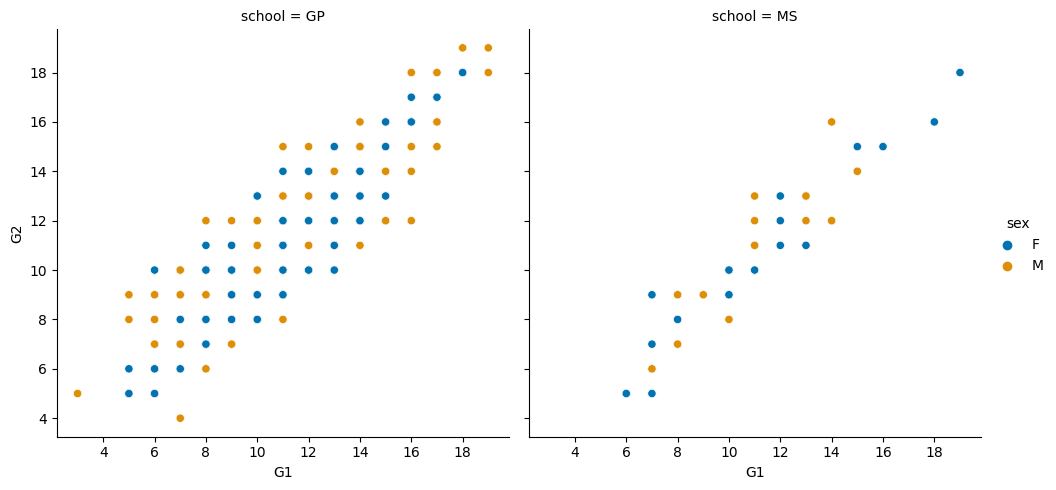

In [ ]:
sns.set_palette('colorblind')
sns.relplot(x='G1', y='G2', hue='sex',col='school',  data=datos[datos.G2>0])

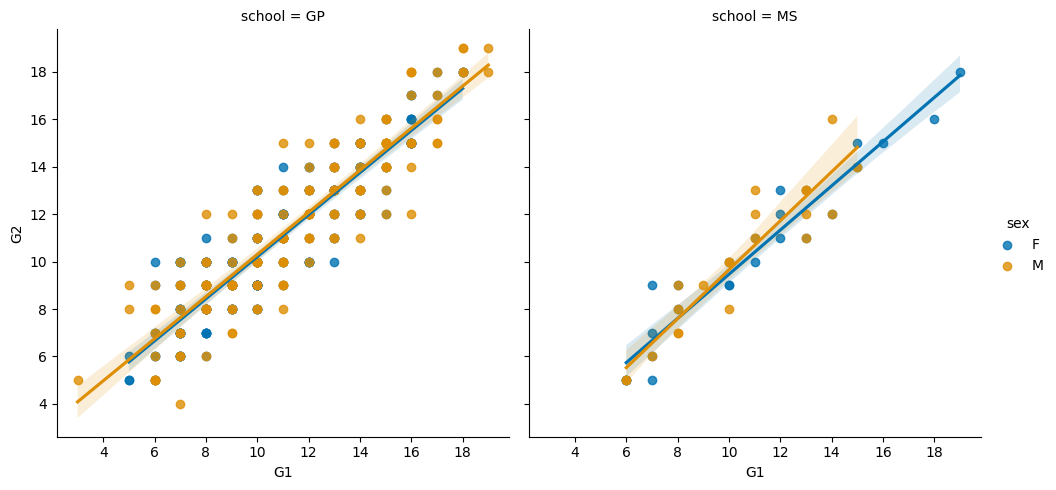

In [ ]:
sns.lmplot(x='G1', y='G2', hue='sex',col='school', data=datos[datos.G2>0])

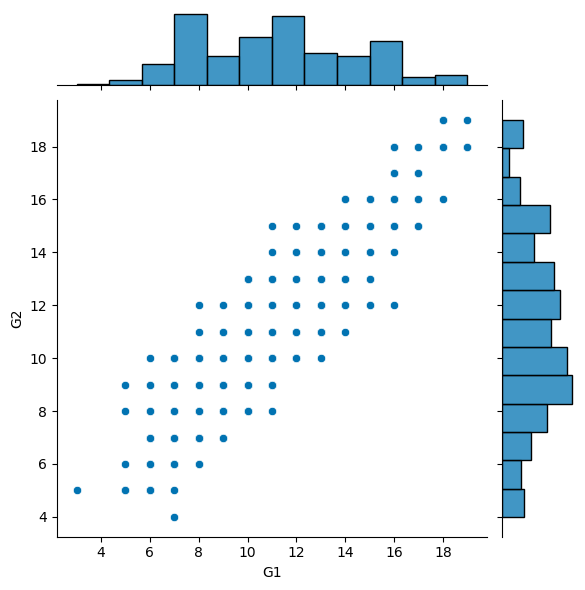

In [ ]:
sns.jointplot(x='G1', y='G2', data=datos[datos.G2>0])

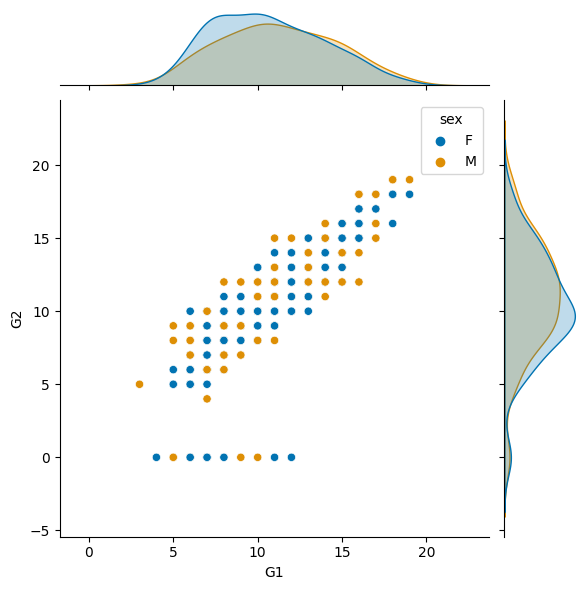

In [ ]:
sns.jointplot(x='G1', y='G2',hue='sex', data=datos)

## Asimetría y Curtosis

In [ ]:
from scipy.stats import kurtosis,skew
print('Indice de Asimetria', skew(datos['G3']))
print('Indice de Curtosis', kurtosis(datos['G3']))

Indice de Asimetria -0.7298871128420806
Indice de Curtosis 0.3831807721034517


## Box Plot

<Axes: xlabel='G1', ylabel='school'>

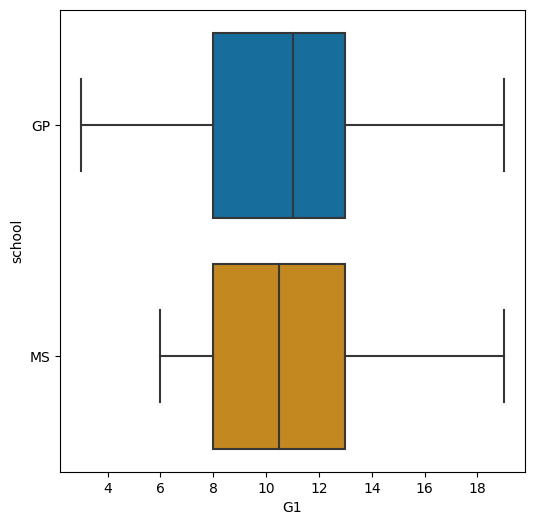

In [ ]:
sns.boxplot(x='G1', y="school", data=datos)

<Axes: xlabel='school', ylabel='G1'>

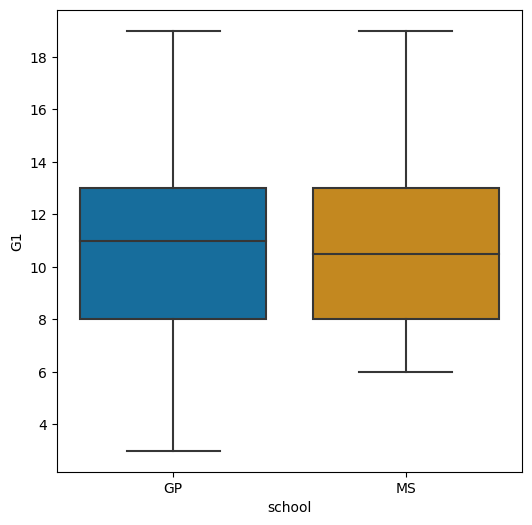

In [ ]:
sns.boxplot(x='school', y="G1", data=datos)

<Axes: xlabel='school', ylabel='G2'>

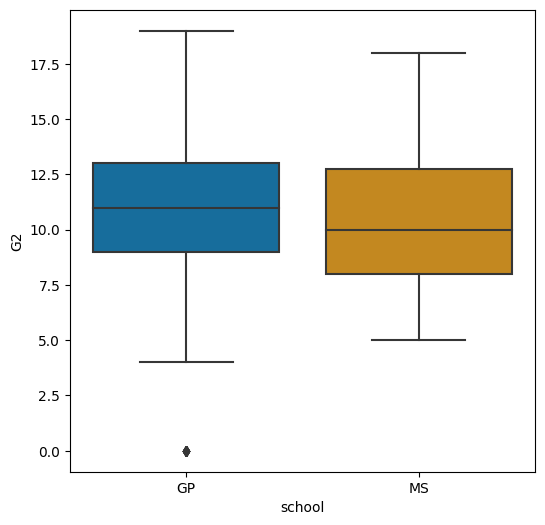

In [ ]:
sns.boxplot(x='school', y="G2", data=datos)

In [ ]:
datos1=datos[(datos.G2>0)] # Desconsiderando datos atipicos

In [ ]:
datos1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


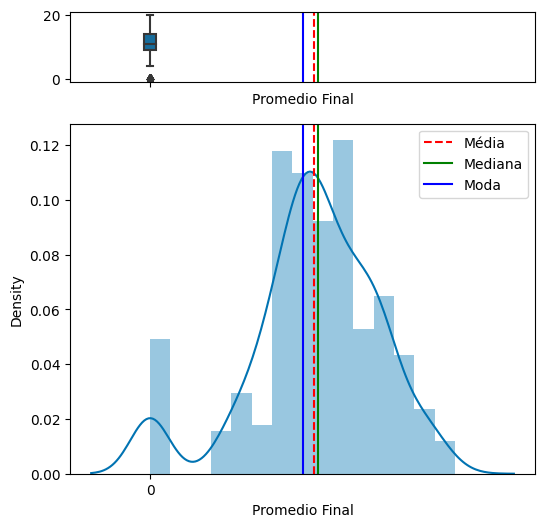

In [ ]:
datos=datos1
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=datos['G3'].mean()
median=datos['G3'].median()
mode = statistics.mode(datos['G3'])

# Para el Boxplot
sns.boxplot(datos['G3'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')


# Para el Histograma
sns.distplot(datos['G3'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Média')
ax_hist.axvline(median, color='g', linestyle='-', label='Mediana')
ax_hist.axvline(mode, color='b', linestyle='-', label='Moda')


plt.legend()


ax_box.set(xlabel='Promedio Final')
ax_hist.set(xlabel='Promedio Final')
plt.show()

In [ ]:
datos_Hombres=datos[datos.sex=='M']
datos_Mujeres=datos[datos.sex=='F']